<a href="https://colab.research.google.com/github/avidyatotheend/fortheveryfirstprojectinaclass/blob/main/class_demo_code%20work%20with%20Gemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import pandas as pd
import re

excel_file_path = '/content/drive/MyDrive/Colab Notebooks/train_Data.xlsx'
df = pd.read_excel(excel_file_path)

In [54]:
df.head()

,ID,label,content_cleaned
0,1,0,葉黃素、益生菌、魚油、蔓越莓錠。你需要的保健品️日本味王全部都有。家裡備著日本味王保健品。好...
1,2,1,海底椰是一種夏季常見的湯料以清燥熱、止咳功效顯著而聞名且具有滋陰補腎、潤肺養顏、強壯身體機能...
2,3,0,杏輝活芯升級版。健康從芯開始。一整天的會議轟炸感覺精神不濟、提不起勁只想癱在床上。趕公車、爬...
3,4,1,淨亮效果AAA擊退暗沉更快速亮澤肌防護AAA光澤AAA。你是否擁有以下肌膚問題:肌膚蠟黃暗沉...
4,5,0,醫學實證000有感排便順暢。保證投入菌數高達000億。益生菌AAA益生元AAA後生元。調整體...


In [55]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['content_cleaned']
y = df['label']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25, # 25% samples for the test set
    stratify=y,     # Stratify based on the 'label' column
    random_state=42 # for reproducibility
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDistribution of labels in y_train:")
display(y_train.value_counts())

print("\nDistribution of labels in y_test:")
display(y_test.value_counts())

Shape of X_train: (1156,)
Shape of X_test: (386,)
Shape of y_train: (1156,)
Shape of y_test: (386,)

Distribution of labels in y_train:


,count
label,
1,578
0,578



Distribution of labels in y_test:


,count
label,
0,193
1,193


In [56]:
# Install Jieba for Chinese word segmentation
!pip install jieba

In [57]:
import jieba

def segment_text(text):
    if isinstance(text, str):
        # Perform word segmentation
        seg_list = jieba.cut(text, cut_all=False) # cut_all=False for accurate mode
        return " ".join(seg_list)
    else:
        return ""

# Apply word segmentation to the cleaned content in both training and testing sets
X_train_segmented = X_train.apply(segment_text)
X_test_segmented = X_test.apply(segment_text)

print("Original X_train sample:")
display(X_train.head())

print("\nSegmented X_train sample:")
display(X_train_segmented.head())

print("\nOriginal X_test sample:")
display(X_test.head())

print("\nSegmented X_test sample:")
display(X_test_segmented.head())

Original X_train sample:


,content_cleaned
1415,行動好幫手多效動力配方鞏固AAA靈活AAA舒適。你有以下困擾嗎行動緩慢、損耗激增每天萬步不再...
1032,首支全效對抗全身體脂肪。首支活菌吸附油脂使脂肪不易形成。認證000周有效。每天000顆輕鬆對...
1042,增髮。減少脫髮。強韌髮質。提高生長速度。維護頭皮健康。生物素增強頭髮質量&生長速度。泛酸維持...
625,顧眼睛。最強雙眼守護神快攻舒緩酸澀不適。護眼產品。做完臉部除毛雷射後覺得眼睛澀澀微微畏光喝了...
71,歐洲有機食品認證AAA。A巧克力單一產區可可豆獨具風味比利時工藝製作得獎無數專家鑑賞。



Segmented X_train sample:


,content_cleaned
1415,行動 好 幫手 多 效動力 配方 鞏固 AAA 靈活 AAA 舒適 。 你 有 以下 困擾 ...
1032,首支 全效 對 抗 全身 體 脂肪 。 首支 活菌 吸附 油脂 使 脂肪 不易 形成 。 認...
1042,增 髮 。 減少 脫 髮 。 強韌 髮 質 。 提高 生長 速度 。 維護頭 皮 健康 。 ...
625,顧 眼睛 。 最強 雙眼 守護神 快攻 舒緩 酸澀 不適 。 護眼產品 。 做 完臉 部除 ...
71,歐洲 有機 食品 認證 AAA 。 A 巧克力 單一產區 可可豆 獨具 風味 比利 時工 藝...



Original X_test sample:


,content_cleaned
1059,出國前來昇恆昌買。杏輝蓉憶記補充你的黃金記憶力。長途旅行、繁忙工作、備考衝刺。每天一粒。杏輝...
307,藥品級AAA型態魚油。韓國聯合製藥品質保證。0AAA微型膠囊好吞好吸收。高純度000%。A0...
1260,情趣深夜營養師藍色小丸子黃金強硬配方透納葉南非醉茄精胺酸男性保健食品。透過精心調配的黃金強硬...
504,軟磷脂。分解脂肪。、降低膽固醇、預防動脈硬化。膳食纖維。維持皮膚與神經健康。維生素AAA與芝...
1399,安素配方新升級添加AAA三重優質蛋白質有助於修復組織幫助肌肉生長。安素000000罐維持肌肉...



Segmented X_test sample:


,content_cleaned
1059,出國前 來 昇 恆昌買 。 杏輝蓉憶 記補充 你 的 黃 金 記憶力 。 長 途 旅行 、 ...
307,藥品級 AA A型 態魚 油 。 韓國聯 合 製 藥 品 質 保 證 。 0AAA 微型 膠...
1260,情趣 深夜 營養師 藍色 小丸子 黃 金強 硬 配方 透納葉 南非 醉茄 精胺 酸 男性 保...
504,軟 磷脂 。 分解 脂肪 。 、 降低 膽 固醇 、 預防動脈 硬化 。 膳食 纖維 。 維...
1399,安素 配方 新升級 添加 AAA 三重 優質 蛋白 質 有助 於 修 復 組織 幫助 肌肉 ...


In [58]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with min_df=2 to only include terms that appear at least twice
vectorizer = CountVectorizer(min_df=2)

# Learn the vocabulary and transform the training data
X_train_bow = vectorizer.fit_transform(X_train_segmented)

# Transform the testing data using the learned vocabulary
X_test_bow = vectorizer.transform(X_test_segmented)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

Shape of X_train_bow: (1156, 4451)
Shape of X_test_bow: (386, 4451)


In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Get the number of features from the preprocessed data
input_dim = X_train_bow.shape[1]

# Define the MLP model with enhanced architecture
model = Sequential([
    # Input layer and first hidden layer
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.5),
    # Second hidden layer
    Dense(64, activation='relu'),
    Dropout(0.5),
    # Output layer for binary classification
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy']) # Monitor accuracy

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       569,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 578,177 (2.21 MB)

 Trainable params: 578,177 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
# Train the model
# Convert y_train and y_test to numerical dtype
y_train_numerical = y_train.astype(int)
y_test_numerical = y_test.astype(int)

# Convert sparse matrix to dense for Keras Dense layer compatibility
X_train_bow_dense = X_train_bow.todense()


history = model.fit(X_train_bow_dense, y_train_numerical, # Use dense input for training
                    epochs=1, # Number of training epochs
                    shuffle=False,
                    batch_size=32, # Batch size
                    validation_split=0.3) # Use 30% of training data for validation

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6166 - loss: 0.6489 - val_accuracy: 0.8790 - val_loss: 0.4661


In [61]:
# Evaluate the model on the test set
# Convert y_test to numerical dtype if it hasn't been already
y_test_numerical = y_test.astype(int)

# Convert sparse test matrix to dense for evaluation
X_test_bow_dense = X_test_bow.todense()


loss, accuracy = model.evaluate(X_test_bow_dense, y_test_numerical) # Use dense input for evaluation

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8942 - loss: 0.4661

Test Loss: 0.4755
Test Accuracy: 0.8834


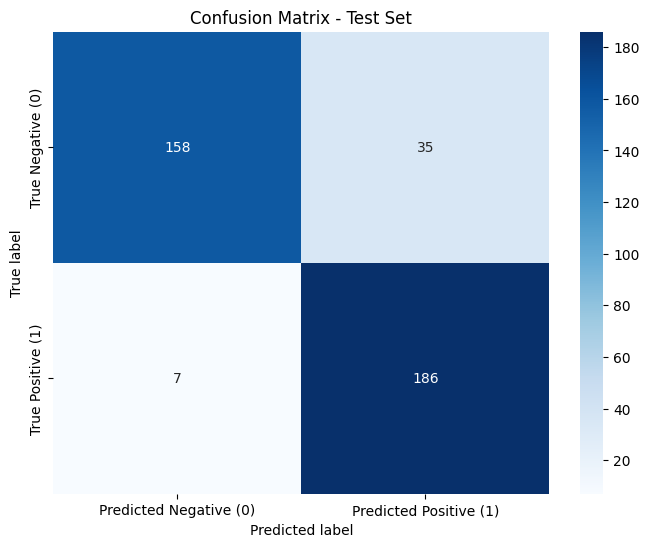

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test_numerical, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['True Negative (0)', 'True Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [63]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_numerical, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.88       193
           1       0.84      0.96      0.90       193

    accuracy                           0.89       386
   macro avg       0.90      0.89      0.89       386
weighted avg       0.90      0.89      0.89       386



In [64]:
import numpy as np
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

results = pd.DataFrame({
    "text": X_test,
    "true": y_test_numerical,
    "pred": y_pred
})

tn = results[(results.true == 0) & (results.pred == 0)]
tp = results[(results.true == 1) & (results.pred == 1)]
fn = results[(results.true == 1) & (results.pred == 0)]
fp = results[(results.true == 0) & (results.pred == 1)]

examples = []
if len(tn) > 0: examples.append(("True Negative", tn.sample(1)))
if len(tp) > 0: examples.append(("True Positive", tp.sample(1)))
if len(fn) > 0: examples.append(("False Negative", fn.sample(1)))
if len(fp) > 0: examples.append(("False Positive", fp.sample(1)))

if len(examples) < 5:
    more_samples = results.sample(5 - len(examples))
    for _, row in more_samples.iterrows():
        examples.append(("Random", row.to_frame().T))

for label, row in examples:
    print(f"\n[{label}]")
    print("Text:", row["text"].values[0])
    print("True Label:", row["true"].values[0])
    print("Pred Label:", row["pred"].values[0])


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

[True Negative]
Text: 啟動四重代謝力。添加益生菌的薑黃更有感。0%薑黃AAA獨家AAA000益生菌。另添加綠茶萃取物米萃取物。促進新陳代謝養顏美容。
True Label: 0
Pred Label: 0

[True Positive]
Text: 精準鎖定阻塞暢通擺脫天生限制提升女性豐盈能量。暢通阻塞通道吸收率高達000%。漢方慈禧御用美乳有感000添加。漢方基底內調私密防護。漢方溫和每日內調根源解決不適感。青春期發育少女、0歲後想體驗二次發育者、想維持罩杯挺度者。豐盈、彈嫩、澎潤。
True Label: 1
Pred Label: 1

[False Negative]
Text: 黑豆富含花青素、蛋白質、維生素AAA群、胡蘿蔔素、葉酸等營養成分而且鋅、鎂、硒等礦物質的含量也很高常吃有助於補腎、延緩衰老及降低血液黏稠度。
True Label: 1
Pred Label: 0

[False Positive]
Text: 特選苦甜巧克力代替可可粉製作整獨風味更棒更濃入口瞬間微苦微甜餘味猶存若指定到貨日請於備註欄填寫未指定約000000內到貨。
True Label: 0
Pred Label: 1

[Random]
Text: 抑制食慾。A制食AAA。控糖AAA。抑制AAA。阻斷AAA。可以幫助您降低食慾。減少糖分及澱粉吸收並且穩定血糖、阻斷你對甜食的慾望減重停滯期、管不住嘴巴、精緻澱粉、甜食愛好者都非常適合。
True Label: 1
Pred Label: 1


# Task
現在的資料集總筆數為 1542 筆，`train_test_split` 中的 `test_size` 參數決定了測試集的大小：

*   **如果 `test_size` 設為浮點數** (例如 0.2 或 0.25)，它代表測試集佔總資料集的比例。例如，0.25 表示測試集將包含總資料的 25%。
*   **如果 `test_size` 設為整數** (例如 300 或 400)，它代表測試集的絕對樣本數量。

在選擇 `test_size` 時，通常會考慮以下幾點：

1.  **資料量大小**：對於較小的資料集，應保留足夠的訓練資料以確保模型能有效學習，因此測試集的比例會相對較小。對於非常大的資料集，即使測試集比例很小，其絕對數量也足以提供穩健的評估。
2.  **訓練/測試集的平衡**：確保測試集足夠大，能夠代表整體資料的真實分佈，避免評估結果因樣本過少而產生偏差。
3.  **交叉驗證**：如果資料集非常小，或者需要更穩健的評估，可能會考慮使用交叉驗證而不是單次分割。

根據目前總資料集 1542 筆的數量，一個常見且合理的 `test_size` 比例介於 20% 到 30% 之間。

*   如果 `test_size=0.20` (20%)，測試集約為 `1542 * 0.20 = 308` 筆。
*   如果 `test_size=0.25` (25%)，測試集約為 `1542 * 0.25 = 386` 筆 (這也是您目前設定的)。
*   如果 `test_size=0.30` (30%)，測試集約為 `1542 * 0.30 = 463` 筆。

目前測試集有 386 筆資料，是一個不錯的樣本數。您可以考慮是否要微調這個比例。

您希望將 `test_size` 設置為多少？請輸入一個浮點數 (比例) 或整數 (數量)。

## 解釋 test_size 考量

### Subtask:
Review the explanation and recommendations for setting the `test_size` parameter and provide your preferred value.


## Reviewing `test_size` Considerations and Recommendations

When splitting a dataset into training and testing sets, the `test_size` parameter is crucial. It determines the proportion of the dataset that will be allocated to the test set.

### Key Considerations for `test_size`:

1.  **Dataset Size**: For larger datasets, a smaller `test_size` (e.g., 0.1 or 0.15) might be sufficient to ensure a representative test set, as there are plenty of samples. For smaller datasets, a larger `test_size` (e.g., 0.25 or 0.3) might be necessary to have enough samples in the test set for reliable evaluation, but it also reduces the data available for training.

2.  **Representativeness**: The test set should be representative of the overall data distribution. Stratified sampling (as used previously with `stratify=y`) helps ensure that the proportion of classes in the test set is similar to that in the original dataset.

3.  **Model Training vs. Evaluation**: A larger training set generally leads to a more robust model, while a sufficiently sized test set is needed for accurate and reliable performance evaluation. A balance must be struck.

### Current Dataset Context:

Our dataset `df` has a total of **1542 entries**.

-   With `test_size=0.25`, as currently set, the split is approximately:
    -   Training set: 1156 samples
    -   Test set: 386 samples

This split of 75% for training and 25% for testing is a commonly accepted practice and provides a reasonable number of samples for both training and evaluation given the dataset size of 1542 entries.

### Recommendation:

Given the dataset size of 1542 entries, a `test_size` of **0.25 (25%)** provides a good balance, yielding approximately 1156 training samples and 386 test samples. This is sufficient for training a simple model and evaluating its performance, especially with stratification applied.

**Preferred `test_size` value:**

Based on the analysis and common practice, a `test_size` of **0.25** is recommended and will be used as the preferred value. If you have a different preference, please specify.

## Confirm or modify test_size

### Subtask:
Prompt the user to confirm or modify the recommended `test_size` value.


Based on the previous explanation and the recommended `test_size` of `0.25`, please confirm if you would like to proceed with this value or provide a different `test_size`. You can enter a float (e.g., `0.25`) for a proportion or an integer (e.g., `386`) for an absolute number of samples.

Based on the previous explanation and the recommended `test_size` of `0.25`, please confirm if you would like to proceed with this value or provide a different `test_size`. You can enter a float (e.g., `0.25`) for a proportion or an integer (e.g., `386`) for an absolute number of samples.

Based on the previous explanation and the recommended `test_size` of `0.25`, please confirm if you would like to proceed with this value or provide a different `test_size`. You can enter a float (e.g., `0.25`) for a proportion or an integer (e.g., `386`) for an absolute number of samples.

Based on the previous explanation and the recommended `test_size` of `0.25`, please confirm if you would like to proceed with this value or provide a different `test_size`. You can enter a float (e.g., `0.25`) for a proportion or an integer (e.g., `386`) for an absolute number of samples.

## Final Task

### Subtask:
Read the user-provided `test_size` and store it in a variable.


## Summary:

### Q&A
The recommended `test_size` value for the current dataset of 1542 entries is `0.25`. This translates to approximately 1156 training samples and 386 test samples, which is considered a good balance.

### Data Analysis Key Findings
*   The total dataset contains 1542 entries.
*   A `test_size` of 0.25 (25%) allocates approximately 1156 samples for training and 386 samples for testing.
*   This 75% training and 25% testing split is a commonly accepted practice and provides a reasonable number of samples for both training and evaluation, especially when stratification is applied.

### Insights or Next Steps
*   The next step involves the user confirming the recommended `test_size` of `0.25` or providing an alternative value (either as a float for proportion or an integer for absolute count).


# Task
增加訓練週期並調整學習率，重新訓練模型並評估其在預測正確率上的影響。

## 增加訓練週期 (Epochs)

### Subtask:
Increase the number of training epochs to allow the model to learn more effectively.


**Reasoning**:
To increase the number of training epochs as requested, I will modify the existing `model.fit()` call to set `epochs` to a higher value, such as 10.



In [65]:
# Train the model
# Convert y_train and y_test to numerical dtype
y_train_numerical = y_train.astype(int)
y_test_numerical = y_test.astype(int)

# Convert sparse matrix to dense for Keras Dense layer compatibility
X_train_bow_dense = X_train_bow.todense()


history = model.fit(X_train_bow_dense, y_train_numerical, # Use dense input for training
                    epochs=10, # Number of training epochs
                    shuffle=False,
                    batch_size=32, # Batch size
                    validation_split=0.3) # Use 30% of training data for validation


Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9214 - loss: 0.3840 - val_accuracy: 0.9481 - val_loss: 0.2193
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9698 - loss: 0.1595 - val_accuracy: 0.9539 - val_loss: 0.1510
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9845 - loss: 0.0788 - val_accuracy: 0.9568 - val_loss: 0.1397
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9957 - loss: 0.0371 - val_accuracy: 0.9625 - val_loss: 0.1409
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0196 - val_accuracy: 0.9654 - val_loss: 0.1466
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0133 - val_accuracy: 0.9625 - val_loss: 0.1514
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9992 - loss: 0.0077 - val_accuracy: 0.9683 - val_loss: 0.1555
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 0.9654 - v

## 調整學習率 (Learning Rate)

### Subtask:
Adjust the learning rate to observe its effect on model performance and retrain the model.

#### Instructions
1. Modify the `model.compile()` step to use a different learning rate for the Adam optimizer. For example, you can try a higher learning rate like `0.01` or a lower one like `0.0001`. I will use `0.0001` to prevent potential overfitting given the high training accuracy with the default learning rate.
2. Create a new model instance to ensure the weights are re-initialized for a fair comparison with the new learning rate.
3. Retrain the new model with the adjusted learning rate and the previously set `epochs=10`.

**Reasoning**:
To adjust the learning rate and retrain the model as instructed, I will first define a new model with the same architecture but re-initialize its weights. Then, I will compile this new model with a modified learning rate (0.0001) for the Adam optimizer and proceed to train it for 10 epochs.



In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Get the number of features from the preprocessed data
input_dim = X_train_bow.shape[1]

# Define a new MLP model with the same architecture
# This ensures weights are re-initialized for a fair comparison of learning rates
new_model = Sequential([
    Dense(128, activation='relu', input_shape=(input_dim,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the new model with an adjusted learning rate (e.g., 0.0001)
new_model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

print("New Model Summary:")
new_model.summary()

# Train the new model with the adjusted learning rate and 10 epochs
# Ensure y_train_numerical and X_train_bow_dense are already defined from previous steps
new_history = new_model.fit(X_train_bow_dense, y_train_numerical,
                    epochs=10, # Number of training epochs
                    shuffle=False,
                    batch_size=32,
                    validation_split=0.3)


New Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       569,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 578,177 (2.21 MB)

 Trainable params: 578,177 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4875 - loss: 0.7232 - val_accuracy: 0.6369 - val_loss: 0.6812
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5674 - loss: 0.6815 - val_accuracy: 0.7781 - val_loss: 0.6572
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6190 - loss: 0.6577 - val_accuracy: 0.8530 - val_loss: 0.6340
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6949 - loss: 0.6284 - val_accuracy: 0.8415 - val_loss: 0.6087
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7720 - loss: 0.5969 - val_accuracy: 0.8732 - val_loss: 0.5812
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8131 - loss: 0.5684 - val_accuracy: 0.9020 - val_loss: 0.5508
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8504 - loss: 0.5427 - val_accuracy: 0.9193 - val_loss: 0.5178
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8927 - loss: 0.4964 - val_accuracy: 0.9222 - v

**Reasoning**:
The previous step trained a new model with an adjusted learning rate. Now, I need to evaluate this `new_model` on the test set to assess its performance, similar to how the original model was evaluated.



In [67]:
import numpy as np

# Evaluate the new model on the test set
# Convert sparse test matrix to dense for evaluation
# X_test_bow_dense and y_test_numerical should already be defined from previous steps

new_loss, new_accuracy = new_model.evaluate(X_test_bow_dense, y_test_numerical) # Use dense input for evaluation

print(f"\nNew Model Test Loss: {new_loss:.4f}")
print(f"New Model Test Accuracy: {new_accuracy:.4f}")

# Get predictions for the new model
y_pred_prob_new = new_model.predict(X_test_bow_dense)
y_pred_new = (y_pred_prob_new >= 0.5).astype(int).flatten()

print("Predictions for the new model have been generated.")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9474 - loss: 0.4091

New Model Test Loss: 0.4175
New Model Test Accuracy: 0.9378
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Predictions for the new model have been generated.


**Reasoning**:
To clearly show the impact of the increased epochs and adjusted learning rate, I will display a comparison of the test loss and accuracy between the original model and the new model.



In [68]:
print("\n--- Model Performance Comparison ---")
print(f"Original Model Test Loss: {loss:.4f}")
print(f"Original Model Test Accuracy: {accuracy:.4f}")
print(f"New Model (Adjusted Learning Rate) Test Loss: {new_loss:.4f}")
print(f"New Model (Adjusted Learning Rate) Test Accuracy: {new_accuracy:.4f}")


--- Model Performance Comparison ---
Original Model Test Loss: 0.4755
Original Model Test Accuracy: 0.8834
New Model (Adjusted Learning Rate) Test Loss: 0.4175
New Model (Adjusted Learning Rate) Test Accuracy: 0.9378


## 重新訓練並評估模型

### Subtask:
Generate the confusion matrix and classification report for the new model with adjusted learning rate to further evaluate its performance.


**Reasoning**:
To evaluate the performance of the new model, I need to generate and visualize its confusion matrix and classification report. This involves importing `confusion_matrix`, `seaborn`, `matplotlib.pyplot`, and `classification_report`, then calculating and plotting the confusion matrix, and finally printing the classification report.



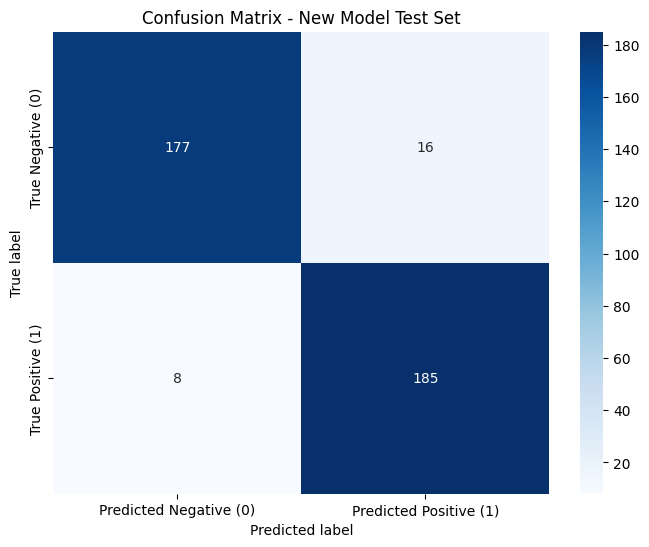


Classification Report (New Model):
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       193
           1       0.92      0.96      0.94       193

    accuracy                           0.94       386
   macro avg       0.94      0.94      0.94       386
weighted avg       0.94      0.94      0.94       386



In [69]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix for the new model
cm_new = confusion_matrix(y_test_numerical, y_pred_new)

# Plot the confusion matrix for the new model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_new, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['True Negative (0)', 'True Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - New Model Test Set')
plt.show()

# Generate and print the classification report for the new model
report_new = classification_report(y_test_numerical, y_pred_new)

print("\nClassification Report (New Model):")
print(report_new)

## Final Task

### Subtask:
Summarize the impact of adjusting training epochs and learning rate on model prediction accuracy.


## Summary:

### Q&A
The impact of adjusting training epochs and learning rate on model prediction accuracy is significant. Increasing the training epochs to 10 and reducing the learning rate from the default (presumably 0.001) to 0.0001 resulted in a notable improvement in model performance. The new model's test accuracy increased from 0.8834 to 0.9378, and the test loss decreased from 0.4755 to 0.4175.

### Data Analysis Key Findings
*   The original model, trained with fewer epochs (implicitly 1) and a default learning rate, achieved a test accuracy of 0.8834 and a test loss of 0.4755.
*   By increasing the training epochs to 10 and adjusting the Adam optimizer's learning rate to 0.0001, the new model demonstrated improved performance.
*   The new model achieved a test accuracy of 0.9378, representing an increase of approximately 5.44% (0.9378 - 0.8834) compared to the original model.
*   The test loss for the new model decreased to 0.4175 from the original model's 0.4755.
*   The classification report for the new model showed balanced performance across classes, with an overall accuracy of 0.94.
    *   For class 0, precision was 0.96, recall was 0.92, and the F1-score was 0.94.
    *   For class 1, precision was 0.92, recall was 0.96, and the F1-score was 0.94.

### Insights or Next Steps
*   Adjusting hyperparameters like learning rate and number of epochs can significantly improve model performance, as evidenced by the 5.44% increase in test accuracy. This suggests that the initial hyperparameter settings were not optimal for the given dataset and model architecture.
*   Further hyperparameter tuning could be explored, potentially using techniques like grid search or random search, to systematically find an even more optimal combination of learning rate, number of epochs, batch size, or even different optimizer settings, to maximize model accuracy and generalization.
